# Tema 1 -  The ML landscape

## Example 1.1 - Training and running a linear model using SciKit-Learn

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [21]:
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',') #thousands indica el separador de miles que queremos 

In [22]:
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', sep='\t', encoding='latin1', na_values='n/a') #sep indica que simbolo queremos que tome como separador de campo. En este caso el separador que le decimos que coja es \t que significa salto de tabulador

In [23]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [26]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


### Preparación de los datos

In [24]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT'] #Nos quedamos solo con aquellas entradas del dataframe que en la columna INEQUALITY tienen un valor de TOT
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value') #Mediante pivot lo que hacemos es cambiar la forma del dataframe: En este caso como index (primera columna del dataframe) hemos elegido que aparezca el nombre del pais, como columns (las siguientes columnas del dataframe) hemos elegido que sean los valores almacenados en la variable Indicator, y como values le decimos que nos muestre los valores de la variable value

In [25]:
oecd_bli.head() #Fijemonos como cambia nuestro df con respecto al principio

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [27]:
gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True) #Le cambiamos el nombre a la columna '2015' por 'GDP per capita'

In [28]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [30]:
gdp_per_capita.set_index('Country', inplace=True) #Le pedimos que tome como index del df la columna 'Country'

In [31]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [32]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True) #Mediante los parametros left_index=True y right_index=True le estamos pidiendo que a la hora de hacer el merge tiene que poner los valores de una misma fila en funcion de los index de las dos tablas

In [33]:
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [34]:
full_country_stats.sort_values(by='GDP per capita', inplace=True) #Ahora pedimos que ordena las entradas del nuevo df en fundio de la variable 'GDP per capita'

In [37]:
full_country_stats.shape

(36, 30)

In [90]:
remove_indices = [0, 1, 6, 8, 33, 34, 35] #Estos paises los eliminamos porque serán los que luego intentaremos predecir cuando tengamos hecho el modelo
keep_indices = list(set(range(36)) - set(remove_indices)) #Generamos una lista con los valores que queremos eliminar

In [91]:
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] #Generamos un df con los datos solo de las columnas que nos importan

In [92]:
country_stats.head(36) #Este sera el df con el que trabajaremos para hacer las predicciones

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


Text(0.5, 1.0, 'GDP Vs Life Satisfaction')

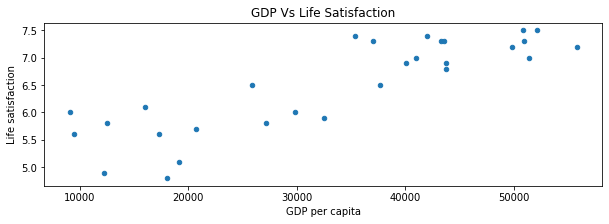

In [102]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(10,3)).set_title("GDP Vs Life Satisfaction")

### Generación del modelo en SciKit Learn

In [147]:
from sklearn import linear_model
reg = linear_model.LinearRegression() #El modelo que utilizaremos será un modelo de regresión lineal
Xs = np.c_[country_stats['GDP per capita']] #Definimos las valores en x de los datos de entrenamiento
Ys = np.c_[country_stats['Life satisfaction']] #Definimos los valore en y (labels) de los datos de entrenamiento
#Lo que hace la funcion np.c_ es convertir un vector de datos horizontal en un vector de datos vertical
reg.fit(Xs,Ys) #Incorporamos al modelo de regresion lineal los datos de entrenamiento. El entrenamiento propiamente dicho

LinearRegression()

In [148]:
#Este modelo lo que genera es una linea de regresion que atraviesa la linea de puntos y que indica la tendencia de la misma
#Recortemos que la ecuacion de una linea recta es y = t0 + t1*x

In [149]:
t0 = reg.intercept_[0] #Pedimos que nos muestre done corta la linea de regresion al punto 0
t0

4.853052800266436

In [150]:
t1 = reg.coef_[0][0] #Pedimos que nos muestre el coeficiente de la recta
t1

4.911544589158484e-05

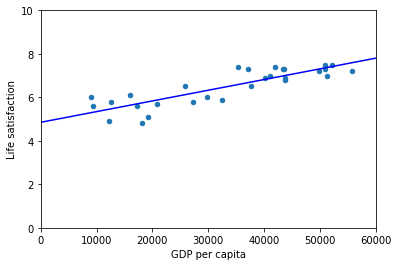

In [154]:
#Dibujemos la recta en nuestra nube de puntos
country_stats.plot(x='GDP per capita', y='Life satisfaction', kind='scatter') #Dibujamos la nube de puntos
X=np.linspace(0, 60000) #Generamos una linea que abarque de x=0 a x=600000
plt.plot(X, t0 + t1*X, 'b') #Pedimos dibuje la recta especificando el rango en x, la ecuacion de la recta y el color
plt.axis([0, 60000, 0, 10])
plt.show()

In [168]:
#Veamos cual es el GDP de Chipre. Dato que volcaremos al modelo para que estime su Life Satisfaction
gdp_per_capita_cyprus = gdp_per_capita.loc['Cyprus']['GDP per capita']
print(gdp_per_capita_cyprus)

22587.49


In [177]:
#Calculemos cual es la prediccion del modelo para Chipre
cyprus_life_satisfaction_estimated = reg.predict([[gdp_per_capita_cyprus]])[0][0]
print(cyprus_life_satisfaction_estimated)

5.96244744318815


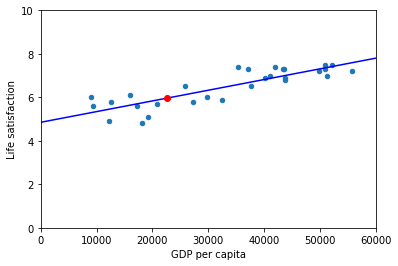

In [194]:
#Dibujemos la recta en nuestra nube de puntos
country_stats.plot(x='GDP per capita', y='Life satisfaction', kind='scatter') #Dibujamos la nube de puntos
X=np.linspace(0, 60000) #Generamos una linea que abarque de x=0 a x=600000
plt.plot(X, t0 + t1*X, 'b') #Pedimos dibuje la recta especificando el rango en x, la ecuacion de la recta y el color
plt.axis([0, 60000, 0, 10])
plt.plot(gdp_per_capita_cyprus, cyprus_life_satisfaction_estimated, 'ro')
plt.show()